# PART 1:
### DOMAIN: Automobile
### • CONTEXT: The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 3 multivalued discrete and 5 continuous attributes

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from scipy import stats

In [103]:
df_json = pd.read_json("Part1 - Car-Attributes.json")

In [104]:
df_json.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [105]:
df_json.shape

(398, 8)

In [106]:
df_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     398 non-null    float64
 1   cyl     398 non-null    int64  
 2   disp    398 non-null    float64
 3   hp      398 non-null    object 
 4   wt      398 non-null    int64  
 5   acc     398 non-null    float64
 6   yr      398 non-null    int64  
 7   origin  398 non-null    int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 25.0+ KB


In [107]:
df_csv = pd.read_csv("Part1 - Car name.csv")

In [ ]:
#test

In [108]:
df_csv.head()

,car_name
0,chevrolet chevelle malibu
1,buick skylark 320
2,plymouth satellite
3,amc rebel sst
4,ford torino


In [109]:
df_csv.shape

(398, 1)

In [110]:
final_df = pd.concat([df_json, df_csv], axis=1)

In [111]:
final_df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [112]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   mpg       398 non-null    float64
 1   cyl       398 non-null    int64  
 2   disp      398 non-null    float64
 3   hp        398 non-null    object 
 4   wt        398 non-null    int64  
 5   acc       398 non-null    float64
 6   yr        398 non-null    int64  
 7   origin    398 non-null    int64  
 8   car_name  398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [113]:
final_df.shape

(398, 9)

In [114]:
final_df['origin'].unique()

array([1, 3, 2], dtype=int64)

In [115]:
final_df['cyl'].unique()

array([8, 4, 6, 3, 5], dtype=int64)

In [116]:
len(final_df['car_name'].unique())

305

In [117]:
final_df.to_csv('Final_mpg_csv1.csv', index=False)

In [118]:
final_df.to_json('Final_mpg_json1.json', orient='index')

In [119]:
final_df.to_excel("Final_mpg_excel.xlsx", index=False)

In [120]:
type(final_df)

pandas.core.frame.DataFrame

In [121]:
final_df.notnull().all(axis=0)

mpg         True
cyl         True
disp        True
hp          True
wt          True
acc         True
yr          True
origin      True
car_name    True
dtype: bool

In [122]:
missing_values = final_df.isnull().sum()

In [123]:
missing_values

mpg         0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
origin      0
car_name    0
dtype: int64

In [124]:
cars_list = final_df['car_name'].unique()

In [125]:
cars_list.sort()

In [126]:
cars_list

array(['amc ambassador brougham', 'amc ambassador dpl',
       'amc ambassador sst', 'amc concord', 'amc concord d/l',
       'amc concord dl', 'amc concord dl 6', 'amc gremlin', 'amc hornet',
       'amc hornet sportabout (sw)', 'amc matador', 'amc matador (sw)',
       'amc pacer', 'amc pacer d/l', 'amc rebel sst', 'amc spirit dl',
       'audi 100 ls', 'audi 100ls', 'audi 4000', 'audi 5000',
       'audi 5000s (diesel)', 'audi fox', 'bmw 2002', 'bmw 320i',
       'buick century', 'buick century 350', 'buick century limited',
       'buick century luxus (sw)', 'buick century special',
       'buick electra 225 custom', 'buick estate wagon (sw)',
       'buick lesabre custom', 'buick opel isuzu deluxe',
       'buick regal sport coupe (turbo)', 'buick skyhawk',
       'buick skylark', 'buick skylark 320', 'buick skylark limited',
       'cadillac eldorado', 'cadillac seville', 'capri ii',
       'chevroelt chevelle malibu', 'chevrolet bel air',
       'chevrolet camaro', 'chevrolet ca

In [127]:
final_df['car_name'] = final_df['car_name'].str.lower()

In [128]:
final_df['car_name'] = final_df['car_name'].str.strip()

In [129]:
cars_list = final_df['car_name'].unique()
cars_list.sort()
cars_list

array(['amc ambassador brougham', 'amc ambassador dpl',
       'amc ambassador sst', 'amc concord', 'amc concord d/l',
       'amc concord dl', 'amc concord dl 6', 'amc gremlin', 'amc hornet',
       'amc hornet sportabout (sw)', 'amc matador', 'amc matador (sw)',
       'amc pacer', 'amc pacer d/l', 'amc rebel sst', 'amc spirit dl',
       'audi 100 ls', 'audi 100ls', 'audi 4000', 'audi 5000',
       'audi 5000s (diesel)', 'audi fox', 'bmw 2002', 'bmw 320i',
       'buick century', 'buick century 350', 'buick century limited',
       'buick century luxus (sw)', 'buick century special',
       'buick electra 225 custom', 'buick estate wagon (sw)',
       'buick lesabre custom', 'buick opel isuzu deluxe',
       'buick regal sport coupe (turbo)', 'buick skyhawk',
       'buick skylark', 'buick skylark 320', 'buick skylark limited',
       'cadillac eldorado', 'cadillac seville', 'capri ii',
       'chevroelt chevelle malibu', 'chevrolet bel air',
       'chevrolet camaro', 'chevrolet ca

### After analysis of the Column car_name we come to know that 'amc concord d/l' and 'amc concord dl' are same. This could be changed as this is a Typo in the data.

In [130]:
final_df.loc[final_df['car_name'] == 'amc concord d/l', 'car_name'] = 'amc concord dl'

In [131]:
cars_list = final_df['car_name'].unique()
cars_list.sort()
cars_list

array(['amc ambassador brougham', 'amc ambassador dpl',
       'amc ambassador sst', 'amc concord', 'amc concord dl',
       'amc concord dl 6', 'amc gremlin', 'amc hornet',
       'amc hornet sportabout (sw)', 'amc matador', 'amc matador (sw)',
       'amc pacer', 'amc pacer d/l', 'amc rebel sst', 'amc spirit dl',
       'audi 100 ls', 'audi 100ls', 'audi 4000', 'audi 5000',
       'audi 5000s (diesel)', 'audi fox', 'bmw 2002', 'bmw 320i',
       'buick century', 'buick century 350', 'buick century limited',
       'buick century luxus (sw)', 'buick century special',
       'buick electra 225 custom', 'buick estate wagon (sw)',
       'buick lesabre custom', 'buick opel isuzu deluxe',
       'buick regal sport coupe (turbo)', 'buick skyhawk',
       'buick skylark', 'buick skylark 320', 'buick skylark limited',
       'cadillac eldorado', 'cadillac seville', 'capri ii',
       'chevroelt chevelle malibu', 'chevrolet bel air',
       'chevrolet camaro', 'chevrolet caprice classic',
   

In [143]:
final_df = final_df.replace('?', np.NaN)

In [144]:
missing_values = final_df.isna().sum()
missing_values

mpg         0
cyl         0
disp        0
hp          6
wt          0
acc         0
yr          0
origin      0
car_name    0
dtype: int64

In [149]:
final_df.dropna(inplace = True)

In [150]:
final_df['hp'].unique()

array([130., 165., 150., 140., 198., 220., 215., 225., 190., 170., 160.,
        95.,  97.,  85.,  88.,  46.,  87.,  90., 113., 200., 210., 193.,
       100., 105., 175., 153., 180., 110.,  72.,  86.,  70.,  76.,  65.,
        69.,  60.,  80.,  54., 208., 155., 112.,  92., 145., 137., 158.,
       167.,  94., 107., 230.,  49.,  75.,  91., 122.,  67.,  83.,  78.,
        52.,  61.,  93., 148., 129.,  96.,  71.,  98., 115.,  53.,  81.,
        79., 120., 152., 102., 108.,  68.,  58., 149.,  89.,  63.,  48.,
        66., 139., 103., 125., 133., 138., 135., 142.,  77.,  62., 132.,
        84.,  64.,  74., 116.,  82.])

In [152]:
missing_values = final_df.isna().sum()
missing_values

mpg         0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
origin      0
car_name    0
dtype: int64

In [177]:
final_df.shape

(392, 9)

## Data Analysis and Visualization

In [153]:
final_df.mpg.describe()

count    392.000000
mean      23.445918
std        7.805007
min        9.000000
25%       17.000000
50%       22.750000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


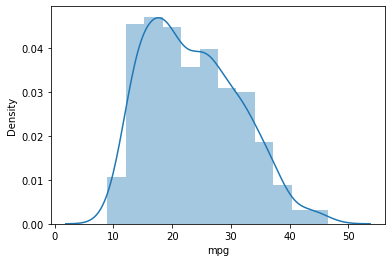

In [154]:
sns.distplot(final_df['mpg']);

In [155]:
print("Skewness: %f" % final_df['mpg'].skew())
print("Kurtosis: %f" % final_df['mpg'].kurt())

Skewness: 0.457092
Kurtosis: -0.515993


In [156]:
def scale(a):
    b = (a-a.min())/(a.max()-a.min())
    return b

In [157]:
data_scale = final_df.copy()

In [158]:
data_scale.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   mpg       392 non-null    float64
 1   cyl       392 non-null    int64  
 2   disp      392 non-null    float64
 3   hp        392 non-null    float64
 4   wt        392 non-null    int64  
 5   acc       392 non-null    float64
 6   yr        392 non-null    int64  
 7   origin    392 non-null    int64  
 8   car_name  392 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


In [159]:
data_scale['hp'] = data_scale['hp'].astype(str)

In [161]:
data_scale['hp'] = data_scale['hp'].astype(float)
data_scale['hp'] = data_scale['hp'].astype(int)

In [165]:
data_scale ['disp'] = scale(data_scale['disp'])
data_scale['hp'] = scale(data_scale['hp'])
data_scale ['acc'] = scale(data_scale['acc'])
data_scale ['wt'] = scale(data_scale['wt'])
data_scale['mpg'] = scale(data_scale['mpg'])
data_scale['cyl'] = scale(data_scale['cyl'])

In [166]:
data_scale.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_name
0,0.239362,1.0,0.617571,0.456522,0.536150,0.238095,70,1,chevrolet chevelle malibu
1,0.159574,1.0,0.728682,0.646739,0.589736,0.208333,70,1,buick skylark 320
2,0.239362,1.0,0.645995,0.565217,0.516870,0.178571,70,1,plymouth satellite
3,0.186170,1.0,0.609819,0.565217,0.516019,0.238095,70,1,amc rebel sst
4,0.212766,1.0,0.604651,0.510870,0.520556,0.148810,70,1,ford torino


In [167]:
data_scale['origin'].unique()

array([1, 3, 2], dtype=int64)

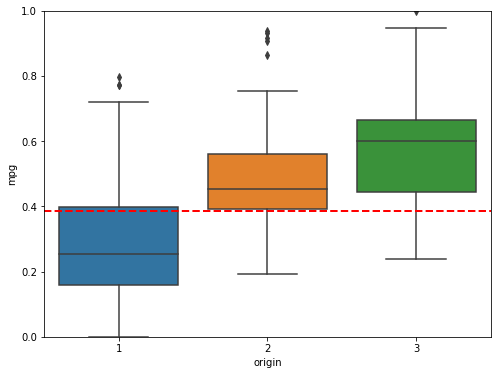

In [168]:
var = 'origin'
data_plt = pd.concat([data_scale['mpg'], data_scale[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="mpg", data=data_plt)
fig.axis(ymin=0, ymax=1)
plt.axhline(data_scale.mpg.mean(),color='r',linestyle='dashed',linewidth=2)

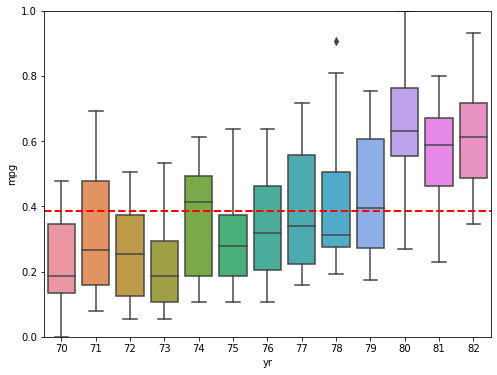

In [169]:
var = 'yr'
data_plt = pd.concat([data_scale['mpg'], data_scale[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="mpg", data=data_plt)
fig.axis(ymin=0, ymax=1)
plt.axhline(data_scale.mpg.mean(),color='r',linestyle='dashed',linewidth=2)

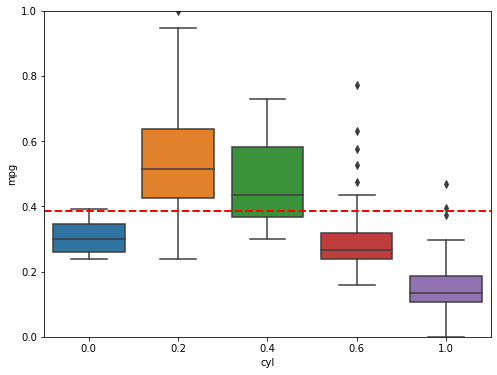

In [170]:
var = 'cyl'
data_plt = pd.concat([data_scale['mpg'], data_scale[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="mpg", data=data_plt)
fig.axis(ymin=0, ymax=1)
plt.axhline(data_scale.mpg.mean(),color='r',linestyle='dashed',linewidth=2)

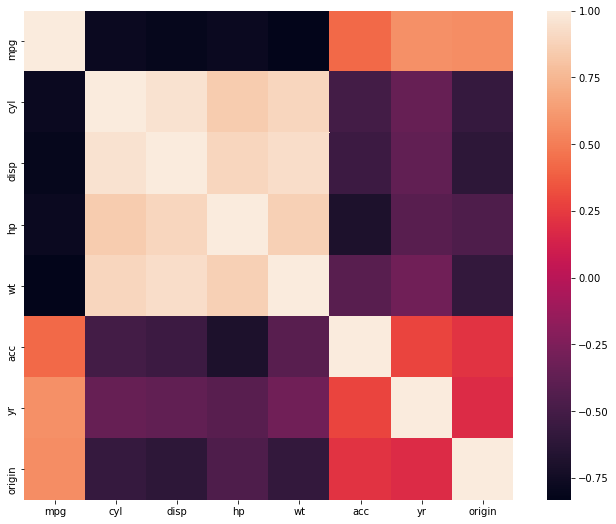

In [171]:
corrmat = final_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, square=True);

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


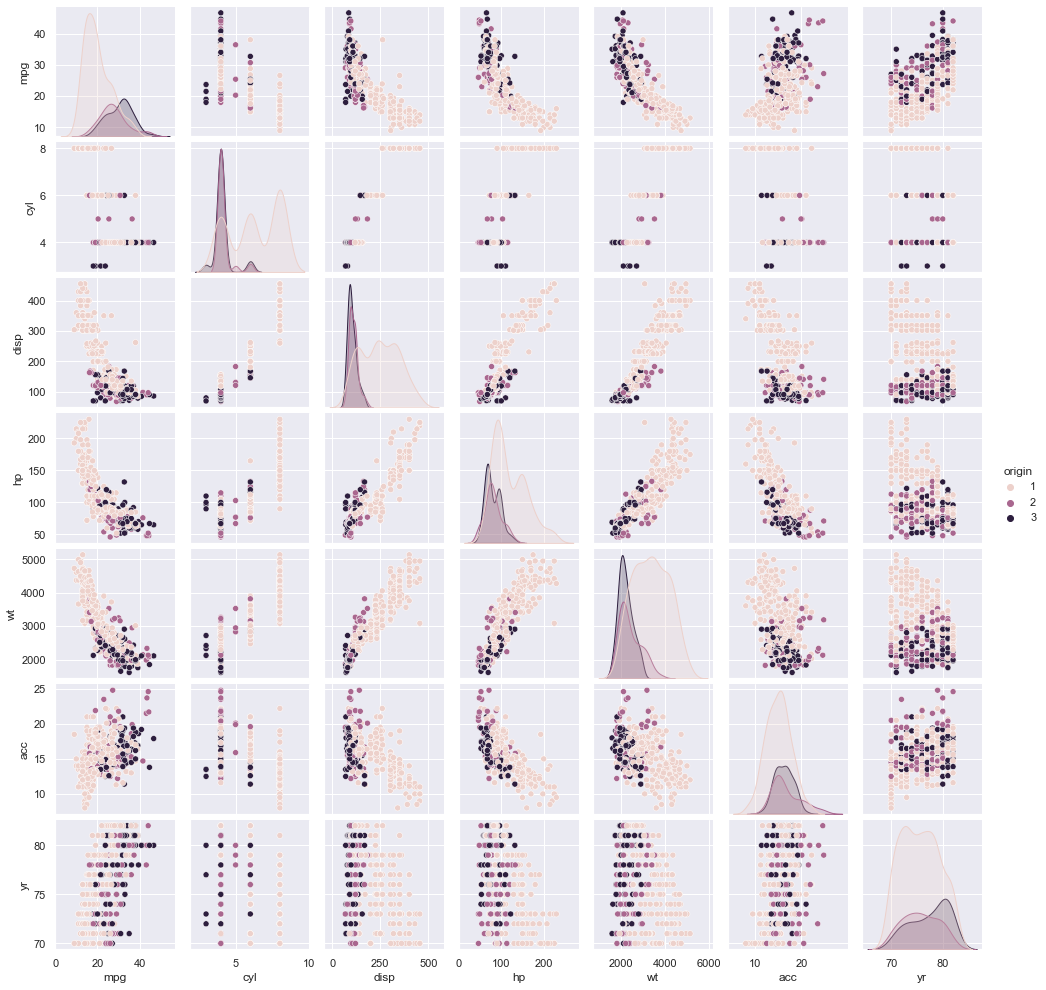

In [173]:
sns.set()
sns.pairplot(final_df, size = 2.0,hue ='origin')
plt.show()

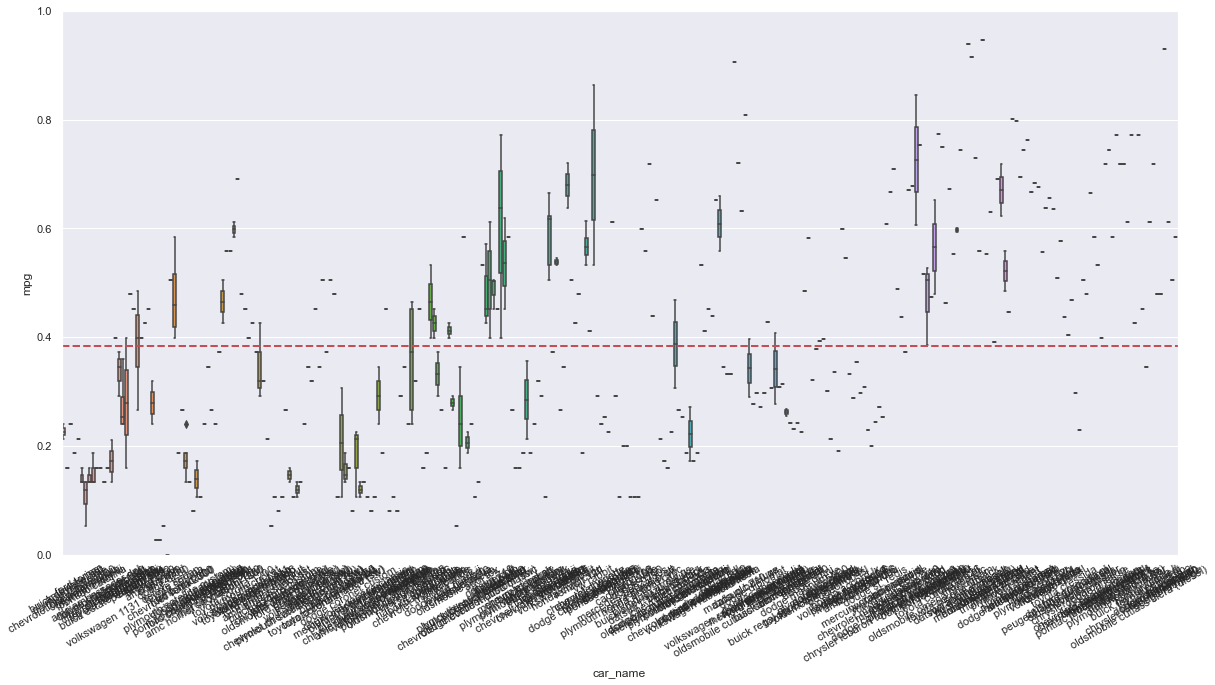

In [175]:
var = 'car_name'
data_plt = pd.concat([data_scale['mpg'], final_df[var]], axis=1)
f, ax = plt.subplots(figsize=(20,10))
fig = sns.boxplot(x=var, y="mpg", data=data_plt)
fig.set_xticklabels(ax.get_xticklabels(),rotation=30)
fig.axis(ymin=0, ymax=1)
plt.axhline(data_scale.mpg.mean(),color='r',linestyle='dashed',linewidth=2)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='hp', ylabel='Density'>

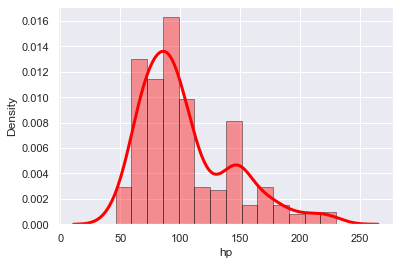

In [179]:
import seaborn as sns
#horsepower distribution
sns.distplot(final_df['hp'], hist=True, kde=True, 
              color = 'Red',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 3})

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='acc', ylabel='Density'>

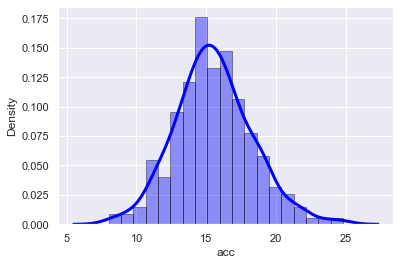

In [183]:
sns.distplot(final_df['acc'], hist=True, kde=True, 
              color = 'blue',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 3})

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='wt', ylabel='Density'>

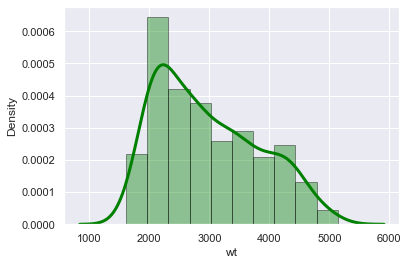

In [184]:
sns.distplot(final_df['wt'], hist=True, kde=True, 
              color = 'green',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 3})

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='disp', ylabel='Density'>

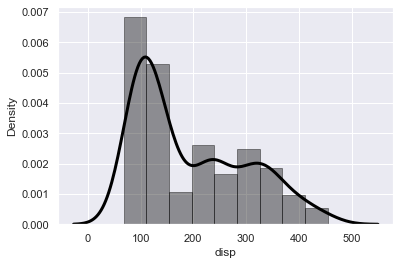

In [186]:
sns.distplot(final_df['disp'], hist=True, kde=True, 
              color = 'black',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 3})

In [187]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   mpg       392 non-null    float64
 1   cyl       392 non-null    int64  
 2   disp      392 non-null    float64
 3   hp        392 non-null    float64
 4   wt        392 non-null    int64  
 5   acc       392 non-null    float64
 6   yr        392 non-null    int64  
 7   origin    392 non-null    int64  
 8   car_name  392 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 38.7+ KB


In [189]:
final_df.describe()

,mpg,cyl,disp,hp,wt,acc,yr,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [197]:
final_df.iloc[:,0:8]

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1
394,44.0,4,97.0,52.0,2130,24.6,82,2
395,32.0,4,135.0,84.0,2295,11.6,82,1
396,28.0,4,120.0,79.0,2625,18.6,82,1


In [199]:
from sklearn.preprocessing import StandardScaler
stand= StandardScaler()
scaled_df = stand.fit_transform(final_df.iloc[:,0:8])

In [201]:
scaled_df

array([[-0.69863841,  1.48394702,  1.07728956, ..., -1.285258  ,
        -1.62531533, -0.71664105],
       [-1.08349824,  1.48394702,  1.48873169, ..., -1.46672362,
        -1.62531533, -0.71664105],
       [-0.69863841,  1.48394702,  1.1825422 , ..., -1.64818924,
        -1.62531533, -0.71664105],
       ...,
       [ 1.09737414, -0.86401356, -0.56847897, ..., -1.4304305 ,
         1.63640964, -0.71664105],
       [ 0.5842277 , -0.86401356, -0.7120053 , ...,  1.11008813,
         1.63640964, -0.71664105],
       [ 0.96908753, -0.86401356, -0.72157372, ...,  1.40043312,
         1.63640964, -0.71664105]])

In [202]:
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt

In [204]:
k_means = KMeans(n_clusters = 2)
k_means.fit(scaled_df)

KMeans(n_clusters=2)

In [208]:
k_means.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,

In [206]:
k_means.inertia_

1557.770758814939

In [211]:
k_means = KMeans(n_clusters = 3)
k_means.fit(scaled_df)
k_means.inertia_

1170.3077985494647

In [212]:
k_means = KMeans(n_clusters = 4)
k_means.fit(scaled_df)
k_means.inertia_

968.0892905416954

In [213]:
k_means = KMeans(n_clusters = 1)
k_means.fit(scaled_df)
k_means.inertia_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


3136.0

In [214]:
k_means = KMeans(n_clusters = 5)
k_means.fit(scaled_df)
k_means.inertia_

815.2102262928405

In [215]:
k_means = KMeans(n_clusters = 6)
k_means.fit(scaled_df)
k_means.inertia_

739.6000894149512

## Calculating WSS for other values of K - Elbow Method and plotting the graph

In [216]:
wss =[] 
for i in range(1,11):
    KM = KMeans(n_clusters=i)
    KM.fit(scaled_df)
    wss.append(KM.inertia_)
wss

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


[3136.0,
 1557.770758814939,
 1170.3077985494647,
 968.1091493182444,
 815.2102262928405,
 739.124413339135,
 669.9469634338154,
 623.0044690870233,
 580.2226051953771,
 549.2235592460148]

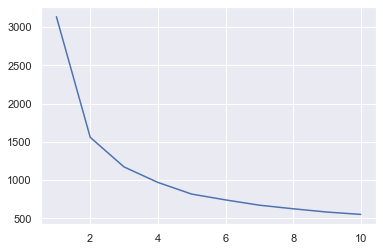

In [217]:
plt.plot(range(1,11), wss)

## Using Hierarchical Method for Clustering

In [219]:
from scipy.cluster.hierarchy import dendrogram, linkage
link_method = linkage(final_df.iloc[:,0:8], method = 'average')

In [223]:
final_df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [225]:
featureset = final_df[['mpg',  'cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'origin']]

In [226]:
from sklearn.preprocessing import MinMaxScaler
x = featureset.values #returns a numpy array
min_max_scaler = MinMaxScaler()
feature_mtx = min_max_scaler.fit_transform(x)
feature_mtx [0:5]

array([[0.2393617 , 1.        , 0.61757106, 0.45652174, 0.5361497 ,
        0.23809524, 0.        , 0.        ],
       [0.15957447, 1.        , 0.72868217, 0.64673913, 0.58973632,
        0.20833333, 0.        , 0.        ],
       [0.2393617 , 1.        , 0.64599483, 0.56521739, 0.51686986,
        0.17857143, 0.        , 0.        ],
       [0.18617021, 1.        , 0.60981912, 0.56521739, 0.51601928,
        0.23809524, 0.        , 0.        ],
       [0.21276596, 1.        , 0.60465116, 0.51086957, 0.52055571,
        0.14880952, 0.        , 0.        ]])

Building the dendogram to find the best cut for finding the best number of clusters.

In [227]:
from scipy.spatial import distance_matrix 
dist_matrix = distance_matrix(feature_mtx,feature_mtx) 
print(dist_matrix)

[[0.         0.24218099 0.12859802 ... 1.46858305 1.49582501 1.51888525]
 [0.24218099 0.         0.16138242 ... 1.58240261 1.6129177  1.63648241]
 [0.12859802 0.16138242 0.         ... 1.4956052  1.5423725  1.56580423]
 ...
 [1.46858305 1.58240261 1.4956052  ... 0.         0.44263235 0.48230283]
 [1.49582501 1.6129177  1.5423725  ... 0.44263235 0.         0.09814063]
 [1.51888525 1.63648241 1.56580423 ... 0.48230283 0.09814063 0.        ]]


<ipython-input-231-244ae32e0f15>:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(dist_matrix, 'complete')


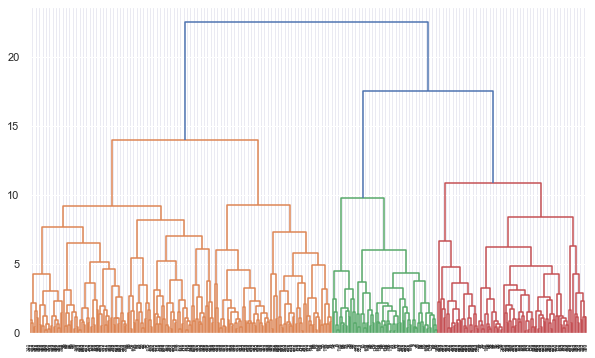

In [231]:
from scipy.cluster import hierarchy 
Z = hierarchy.linkage(dist_matrix, 'complete')
plt.figure(figsize=(10,6))
dendro = hierarchy.dendrogram(Z)

From the Dendogram we can see that, the best place to cut is 2

In [251]:
from sklearn.cluster import AgglomerativeClustering
agglom = AgglomerativeClustering(n_clusters = 2, linkage = 'complete')
agglom.fit(feature_mtx)
agglom.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,

In [252]:
final_df['clusters'] = agglom.labels_
final_df.head(20)

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_name,cluster_,clusters
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,0,0
5,15.0,8,429.0,198.0,4341,10.0,70,1,ford galaxie 500,0,0
6,14.0,8,454.0,220.0,4354,9.0,70,1,chevrolet impala,0,0
7,14.0,8,440.0,215.0,4312,8.5,70,1,plymouth fury iii,0,0
8,14.0,8,455.0,225.0,4425,10.0,70,1,pontiac catalina,0,0
9,15.0,8,390.0,190.0,3850,8.5,70,1,amc ambassador dpl,0,0


In [253]:
final_df.clusters.value_counts().sort_index()

0    179
1    213
Name: clusters, dtype: int64

In [250]:
aggdata=final_df.iloc[:,0:10].groupby('cluster_').mean()
aggdata['Freq']=final_df.cluster_.value_counts().sort_index()
aggdata

,mpg,cyl,disp,hp,wt,acc,yr,origin,Freq
cluster_,,,,,,,,,
0,16.899441,7.150838,293.715084,133.849162,3738.212291,14.427933,74.675978,1.016760,179
1,28.947418,4.061033,110.960094,79.779343,2338.370892,16.476995,77.075117,2.046948,213
